# 1. Matriu de confusió

Respon els apartats a, b i c sobre el codi següent.

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


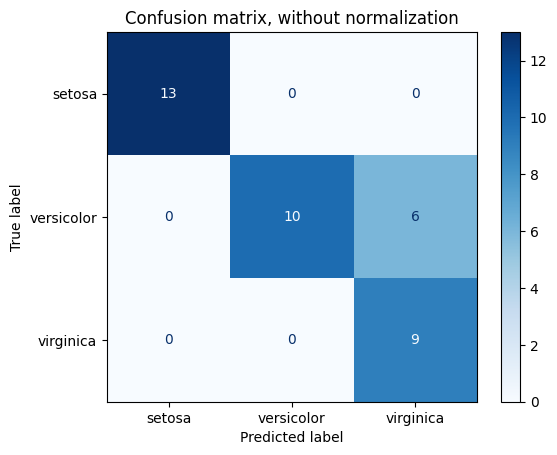

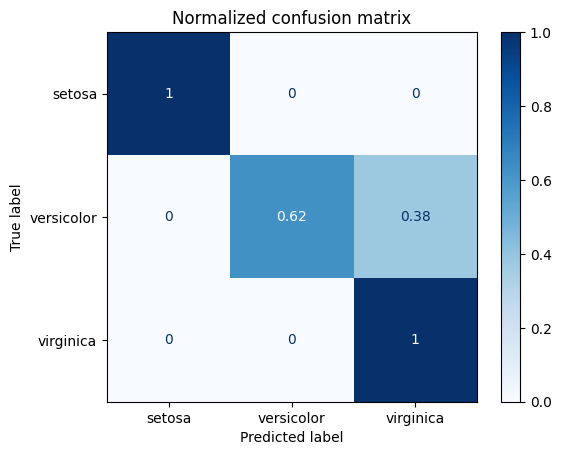

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
	("Confusion matrix, without normalization", None),
	("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
	disp = ConfusionMatrixDisplay.from_estimator(
		classifier,
		X_test,
		y_test,
		display_labels=class_names,
		cmap=plt.cm.Blues,
		normalize=normalize,
	)
	disp.ax_.set_title(title)

	print(title)
	print(disp.confusion_matrix)

plt.show()

a) Afegeix codi que mostri quina és la mida dels conjunts d'entrenament i validació.

In [2]:
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(f'Precisión en el conjunt de validació (prova): {accuracy:.2f}')

Dimensiones de X_train: (112, 4)
Dimensiones de y_train: (112,)
Precisión en el conjunt de validació (prova): 0.97


b) Quin model de classificació s'està usant?

Se está utilizando el modelo de confusion de matriz 

c) De quin càlcul surten els nombres 0.62 i 0.38?

Estos valores provienen de **normalizar la matriz de confusión**. La matriz original es:

Confusion matrix
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]


Para normalizar, se divide cada valor de la fila por el total de esa fila:

- Fila 1 (Clase 0): [1.0, 0.0, 0.0]
- Fila 2 (Clase 1): [0.0, 0.625, 0.375]
- Fila 3 (Clase 2): [0.0, 0.0, 1.0]


- **0.62**: Proporción de **verdaderos positivos** para la clase 1.
- **0.38**: Proporción de **falsos negativos** para la clase 1.

d) Modifica els valors dels vectors **y_true** i **y_pred**, sense canviar la longitud dels vectors, de forma que els **falsos positius** (fp) augmentin en una unitat i els **veritables negatius** (tn) davallin una unitat.

In [3]:
from sklearn.metrics import confusion_matrix
y_true = [0, 1, 0, 1, 0, 0, 0, 1, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1, 1, 1]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(np.int64(2), np.int64(4), np.int64(2), np.int64(1))

# 2. Corba ROC

In [4]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
y = iris.target_names[y]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)
(
    X_train,
    X_test,
    y_train,
    y_test,
) = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)


from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)


from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

label_binarizer.transform(["virginica"])

array([[0, 0, 1]])

In [5]:
class_of_interest = "virginica"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

np.int64(2)

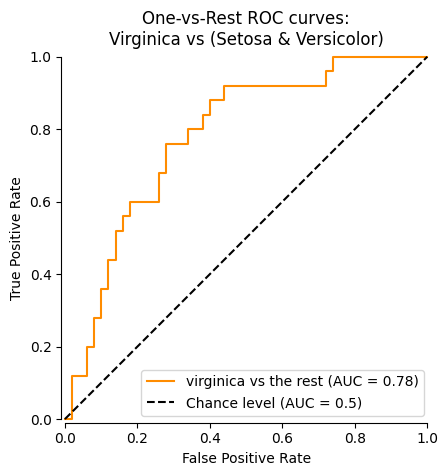

In [6]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)",
)

a) Explicau el significat de la línia negra discontínua, de pendent 1.

La línea discontinua indica el rendimiento de un modelo aleatorio. Cualquier modelo por encima de esta línea está haciendo mejores predicciones que aleatorio. Si el modelo está por debajo de esta línea, significa que está realizando peores predicciones que aleatorio. Si la curva se acerca a la parte inferior derecha, se indica un alto número de falsos positivos y un rendimiento peor que aleatorio.

b) Obteniu el valor i el gràfic de l'àrea sota la corba per a la classe "setosa", amb les etiquetes corresponents.

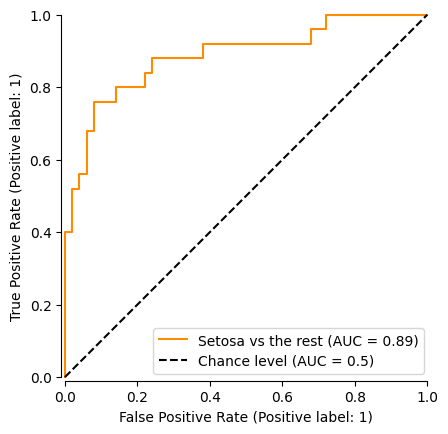

In [7]:
class_of_interest = "Setosa" 
class_id = 0
class_id

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)

c) Obteniu el valor i el gràfic de l'àrea sota la corba de la classe "virginica", amb les etiquetes corresponents.

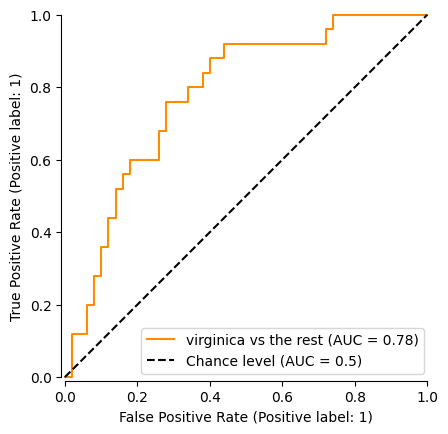

In [8]:
class_of_interest = "virginica"
class_id = label_binarizer.classes_.tolist().index(class_of_interest)


display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)

d) Ordenau les tres classes per qualitat de classificació, d'acord amb la seva àrea sota la corba.

In [9]:
from sklearn.metrics import roc_auc_score

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)


auc_scores = {}
for class_id, class_name in enumerate(label_binarizer.classes_):
    auc_scores[class_name] = roc_auc_score(y_onehot_test[:, class_id], y_score[:, class_id])
    
sorted_auc = sorted(auc_scores.items(), key=lambda x: x[1], reverse=True)


print("Clasificación de las clases según el AUC:")
for class_name, auc in sorted_auc:
    print(f"{class_name}: AUC = {auc:.2f}")

Clasificación de las clases según el AUC:
setosa: AUC = 0.89
virginica: AUC = 0.78
versicolor: AUC = 0.66


# 3. Corbes de validació

In [10]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.svm import SVC

np.random.seed(0)
X, y = load_iris(return_X_y=True)
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]
param_range = np.power(2.0, np.arange(-7, 4,3)) 
train_scores, valid_scores = validation_curve(
    SVC(kernel="linear"), X, y, param_name="C", param_range=param_range,
)
train_scores
valid_scores

array([[0.9 , 0.87, 0.93, 0.97, 0.93],
       [1.  , 0.87, 1.  , 1.  , 0.93],
       [1.  , 0.97, 1.  , 1.  , 0.97],
       [1.  , 0.93, 1.  , 0.97, 0.9 ]])

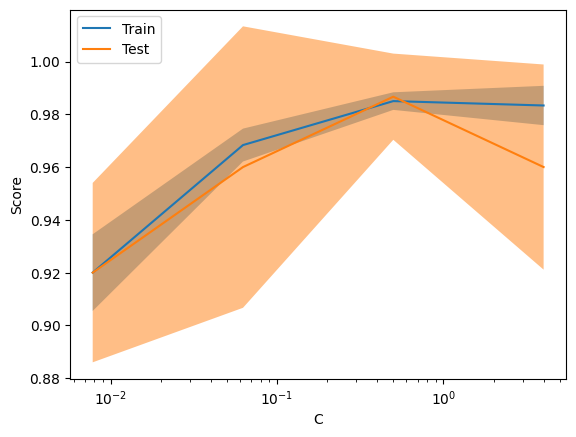

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
ValidationCurveDisplay.from_estimator(
   SVC(kernel="linear"), X, y, param_name="C", param_range=param_range
)

a) A la corba de validació anterior, modificau el codi perquè en lloc de potències de deu, mostri el resultat per a potències de 2, en un rang similar.

Claro, aquí tienes la redacción mejorada en Markdown:


En este caso, se está produciendo **sobreajuste**, ya que los resultados obtenidos en los **datos de entrenamiento** son altos, mientras que los resultados en los **datos de validación** son bajos. Esto sugiere que el modelo ha aprendido demasiado bien las particularidades del conjunto de entrenamiento, pero no generaliza adecuadamente a nuevos datos. Este comportamiento es típico del sobreajuste, donde el modelo se ajusta demasiado a los datos específicos de entrenamiento y pierde capacidad para generalizar a datos no vistos.


b) Quin és en aquest cas el punt d'equilibri entre infraajust i sobreajust?

El **punto de equilibrio** entre **infraajuste** y **sobreajuste** es aquel en el que el modelo consigue una buena **capacidad de generalización**, es decir, tiene un buen rendimiento tanto en los **datos de entrenamiento** como en los **datos de validación**, sin caer en un ajuste excesivo ni en un ajuste insuficiente.

# 4. Regressió

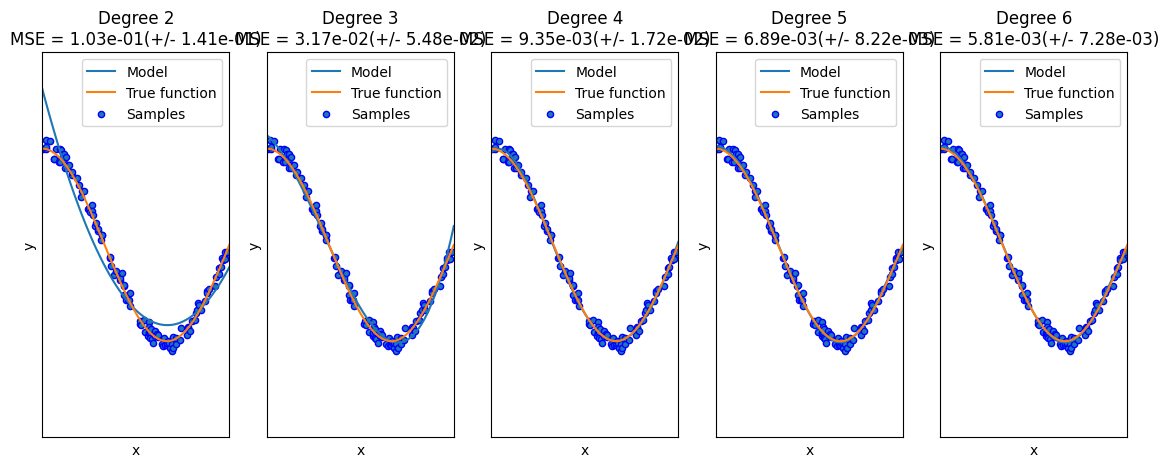

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 120
degrees = [ 2, 3, 4, 5, 6]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.05

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

a) Quan els graus dels polinomis són 1,4 i 15 està clar que el millor ajust es produeix per al grau 4. Ara bé, afinem una mica més al voltant de 4. Per això, modificau el vector de graus perquè contengui els valors 2, 3, 4, 5,6.

b) Quin és en aquest cas el grau que obté un valor més baix d'error quadràtic mitjà? Quin és aquest valor?

El valor más bajo de error error media cuadrática corresponde al polinomio de grado 6, con un  error media cuadrática  de 5.81e-03 (+/- 7.28e-03). 

c) Correspon amb el gràfic més ajustat entre les corbes blava i taronja?

Si, el polinomio de grado 6 tiene el menor error media cuádratica, y en el gráfico se puede observar que su curva azul (el modelo) se ajusta muy bien a la curva naranja (la función real). Esto indica que el modelo de grado 6 captura correctamente la tendencia de los datos.

d) Duplicau el nombre de mostres preses (n_samples). En aquest cas coincideixen l'error quadràtic mitjà i les corbes més coincidents? Per a quin grau del polinomi?

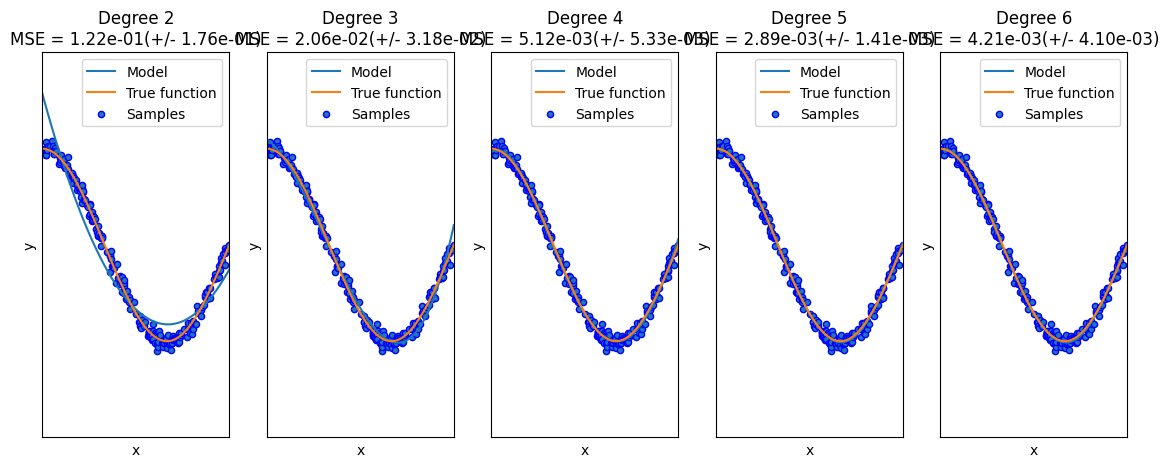

In [13]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 240
degrees = [ 2, 3, 4, 5, 6]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.05

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

Con el doble de muestras, el grado del polinomio que minimiza el error cuadrático medio y se ajusta mejor a la función real es el grado 5.